In [14]:
from torch.nn import BCEWithLogitsLoss
import torch
import numpy as np
from func.network import VoxResNet, CellSegNet_basic_lite, CellSegNet_basic_edge_gated_IV
import matplotlib.pyplot as plt
import torch.nn as nn

In [15]:
load_path = 'output/model_HMS.pkl'
#load_path = 'output/model_HMS_delete_fake_cells.pkl'

# init model
model=CellSegNet_basic_lite(input_channel=1, n_classes=3, output_func = "softmax")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

checkpoint = torch.load(load_path)
model.load_state_dict(checkpoint['model_state_dict'], strict=False)

CellSegNet_basic_lite(
  (conv1): Conv3d(1, 16, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  (conv2): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
  (bnorm1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
  (resmodule1): ResModule(
    (batchnorm_module): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv_module): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
  )
  (conv4): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
  (resmodule2): ResModule(
    (batchnorm_module): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv_module): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
  )
  (conv5): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
  (resmodule3): R

In [16]:
test_img = np.load("data/CellSeg_dataset/HMS_processed/raw/135.npy")

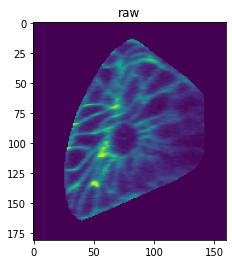

In [17]:
plt.figure()
plt.title("raw")
plt.imshow(test_img[:,150,:])

In [18]:
# test_img_cropped = test_img[60:124, 100:164, 40:104]
test_img_cropped = test_img[0:64, 0:64, 0:64]

In [19]:
raw_img_crop=torch.from_numpy(test_img_cropped).float().to(device)
raw_img_crop = torch.unsqueeze(raw_img_crop, 0)
raw_img_crop = torch.unsqueeze(raw_img_crop, 0)
print(raw_img_crop.shape)
output_model = model(raw_img_crop)

torch.Size([1, 1, 64, 64, 64])


In [20]:
output_model = output_model.detach().numpy()

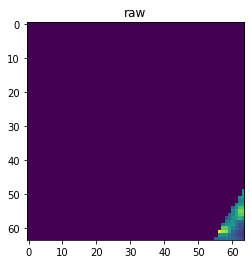

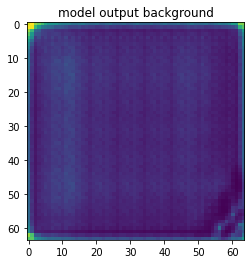

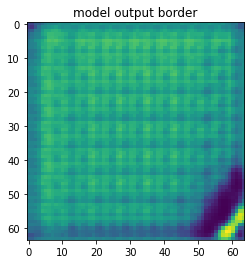

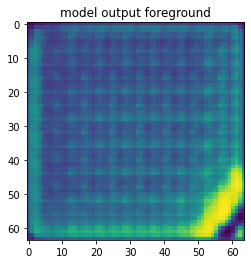

In [21]:
plt.figure()
plt.title("raw")
plt.imshow(test_img_cropped[:,50,:])

plt.figure()
plt.title("model output background")
plt.imshow(output_model[0,0,:,50,:])

plt.figure()
plt.title("model output border")
plt.imshow(output_model[0,1,:,50,:])

plt.figure()
plt.title("model output foreground")
plt.imshow(output_model[0,2,:,50,:])

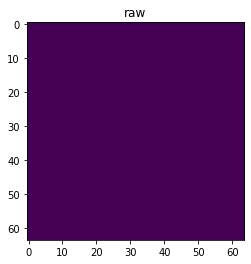

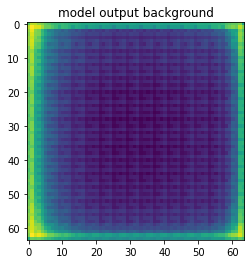

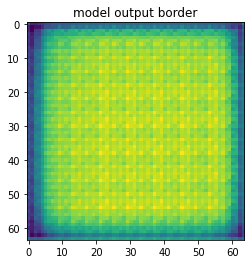

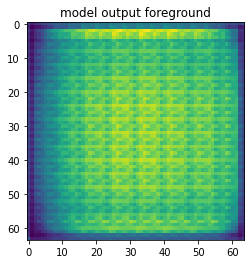

In [22]:
plt.figure()
plt.title("raw")
plt.imshow(test_img_cropped[0,:,:])

plt.figure()
plt.title("model output background")
plt.imshow(output_model[0,0,0,:,:])

plt.figure()
plt.title("model output border")
plt.imshow(output_model[0,1,0,:,:])

plt.figure()
plt.title("model output foreground")
plt.imshow(output_model[0,2,0,:,:])

In [23]:
from func.dataset_preprocess import process_one_cuboid_with_all_edges


background_mask = np.load('data/CellSeg_dataset/HMS_processed/segmentation/70/70_background_3d_mask.npy')
foreground_mask = np.load('data/CellSeg_dataset/HMS_processed/segmentation/70/70_foreground_3d_mask.npy')
boundary_mask = np.load('data/CellSeg_dataset/HMS_processed/segmentation/70/70_boundary_3d_mask.npy')

background_mask_cropped = background_mask[60:124, 100:164, 40:104]
foreground_mask_cropped = foreground_mask[60:124, 100:164, 40:104]
boundary_mask_cropped = boundary_mask[60:124, 100:164, 40:104]

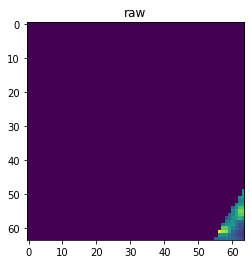

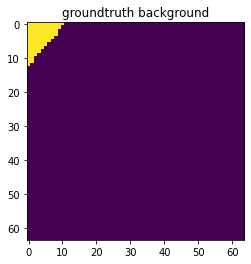

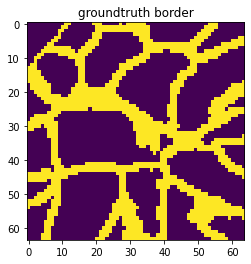

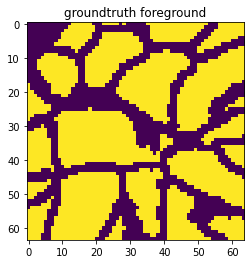

In [24]:
plt.figure()
plt.title("raw")
plt.imshow(test_img_cropped[:,50,:])

plt.figure()
plt.title("groundtruth background")
plt.imshow(background_mask_cropped[:,50,:])

plt.figure()
plt.title("groundtruth border")
plt.imshow(boundary_mask_cropped[:,50,:])

plt.figure()
plt.title("groundtruth foreground")
plt.imshow(foreground_mask_cropped[:,50,:])


In [25]:
background_mask.shape

(181, 331, 160)

In [26]:
np.unique(foreground_mask_cropped[:,50,:])

array([0., 1.], dtype=float32)